In [1]:
import os
import sys
from array import array
from pathlib import Path
from typing import TypeVar

if "__file__" in globals():
    sys.path.append(str((Path(__file__).parent / "..").resolve()))
else:
    sys.path.append(str(Path(os.getcwd(), "..").resolve()))
import numpy as np

# import dezero's simple_core explicitly
# import dezero
from dezero.core_simple import Variable

# if not dezero.is_simple_core:
#     from dezero.core_simple import Variable, setup_variable

#     setup_variable()

In [2]:
T = TypeVar("T", Variable, int, float, np.ndarray, np.generic)

In [3]:
def rosenbrock(x0: T, x1: T) -> T:
    y = 100 * (x1 - x0**2) ** 2 + (x0 - 1) ** 2
    return y

In [4]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 1000

In [5]:
y = rosenbrock(x0, x1)
y.backward()

print(x0.grad, x1.grad)

-2.0 400.0


In [6]:
arr_x0 = array("f", [x0.data.item()])
arr_x1 = array("f", [x1.data.item()])

for i in range(iters):
    print(x0, x1)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

    arr_x0.append(x0.data.item())
    arr_x1.append(x1.data.item())

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

In [7]:
import matplotlib.colors
import matplotlib.pyplot as plt


_z_for_plot.min()=np.float64(0.0)
_z_for_plot.max()=np.float64(2509.0)


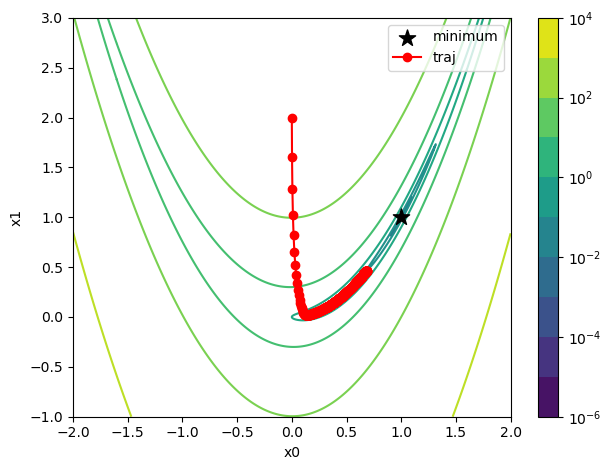

In [8]:
fig, ax = plt.subplots()

_x_for_plot = np.linspace(-2, 2, 1001)
_y_for_plot = np.linspace(-1, 3, 1001)
_z_for_plot = rosenbrock(*np.meshgrid(_x_for_plot, _y_for_plot))

# 最小値が0のため、対数にするとエラーになる。0に最小値の1/2を代入する
print(f"{_z_for_plot.min()=}")
print(f"{_z_for_plot.max()=}")
_z_for_plot[np.isclose(_z_for_plot, 0.0)] = (
    _z_for_plot[_z_for_plot > 0].min() / 2
)

kwargs_contour = dict(
    cmap="viridis",
    norm=matplotlib.colors.LogNorm(),
)

ax.contour(
    _x_for_plot,
    _y_for_plot,
    _z_for_plot,
    **kwargs_contour,
)

# 最小点をプロット
_idx_y_min, _idx_x_min = np.unravel_index(
    np.argmin(_z_for_plot), shape=_z_for_plot.shape
)
ax.scatter(
    _x_for_plot[_idx_x_min],
    _y_for_plot[_idx_y_min],
    marker="*",
    color="black",
    s=150,
    zorder=5.0,
    label="minimum",
)

# 軌跡のプロット
ax.plot(arr_x0, arr_x1, marker="o", color="red", label="traj")

# ダミーのフレームにcontourfをプロット。
# これを使用してカラーバーを書く
hidden_ax = fig.add_subplot(111, frame_on=False)
hidden_ax.set_visible(False)
mappable = hidden_ax.contourf(
    _x_for_plot,
    _y_for_plot,
    _z_for_plot,
    **kwargs_contour,
)

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()

fig.colorbar(mappable, ax=ax)
fig.tight_layout()